<h1>Final task</h1>

You are given two synthetic datasets with for regression tasks.

Your goal is to apply your knowledge in EDA, data preprocessing and model training. Also, you should provide complete explanation of your steps meaningful from the machine learning point of view. For example, *why do you use that particular plot?* *Why do you suppose that this model will work well with your data?* 

Write down your answer for test data into `{FirstName}_{SecondName}_answer.csv` file.  

P.s. do not hesitate to use whole arsenal of methods you have learned during the course and descrive the motivations well - then even if your score is not so great, you will recieve good score. 

---

# Ehsan Shaghaei
> e.shaghaei@innopolis.university

# Loading Data

In [553]:
import pandas   as pd
import numpy as np
import matplotlib.pyplot as plt
FirstName='Ehsan'
SecondName='Shaghaei'
PATH = f'{FirstName}_{SecondName}_answer.csv'

train1_df = pd.read_csv('train_1.csv').sort_values(['index'],axis=0).drop(['index','y'],axis=1)
train2_df = pd.read_csv('train_2.csv').sort_values(['index'],axis=0).drop(['index'],axis=1)
train = pd.concat([train1_df,train2_df],axis=1).reset_index(drop=True)
train.columns = list(np.arange(len(train.columns)-1))+['y']
X,y = train.drop(['y'],axis=1).to_numpy(),train['y'].to_numpy()
del train1_df,train2_df


test1_df = pd.read_csv('test_1.csv')
test2_df = pd.read_csv('test_2.csv')
test = pd.concat([test1_df,test2_df],axis=1)
X_test = test.to_numpy()
del test1_df,test2_df


## EDA

* Evaluating Missining values

> No missing values in the dataset

In [492]:
print('Total number of missing values =',train.isna().sum().sum())
pd.DataFrame(train.isna().sum().T,columns=['#na']).T

Total number of missing values = 0


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,y
#na,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Observing feature types
> All features are numerical

In [493]:
pd.concat([train.describe().T,train.corr()['y'].rename("Correlation with y")],axis=1).sort_values(by=["Correlation with y"])

,count,mean,std,min,25%,50%,75%,max,Correlation with y
29,80.0,34.500000,17.994373,0.000000,20.000000,40.000000,40.000000,60.000000,-0.243251
17,80.0,-74.733383,247.740795,-1613.024746,-13.412025,-0.240915,-0.008462,197.142376,-0.195266
16,80.0,-112.521263,295.710699,-1880.680981,-45.778878,-0.887245,-0.005106,39.031156,-0.172842
6,80.0,-2.351983,77.652259,-331.546048,-3.029805,0.000752,0.217623,454.594079,-0.164645
0,80.0,-80.582229,276.550264,-1439.497018,-31.975664,-0.243580,-0.001820,477.101391,-0.094760
18,80.0,-87.273594,256.191189,-1843.727756,-33.075170,-1.779391,-0.008616,7.347473,-0.088110
13,80.0,-18.995333,261.266546,-1863.013989,-0.850975,0.003042,3.174767,663.566006,-0.064214
21,80.0,-787.596407,5391.638667,-9516.922269,-5427.792429,-482.094438,4386.812805,7643.959901,-0.053918
41,80.0,1490.837138,10901.679487,-16418.565280,-8189.349992,2026.585585,11834.232577,18611.421447,-0.049949
14,80.0,-60.392577,199.154289,-1400.180655,-12.051034,-0.227355,-0.005354,86.140239,-0.046001


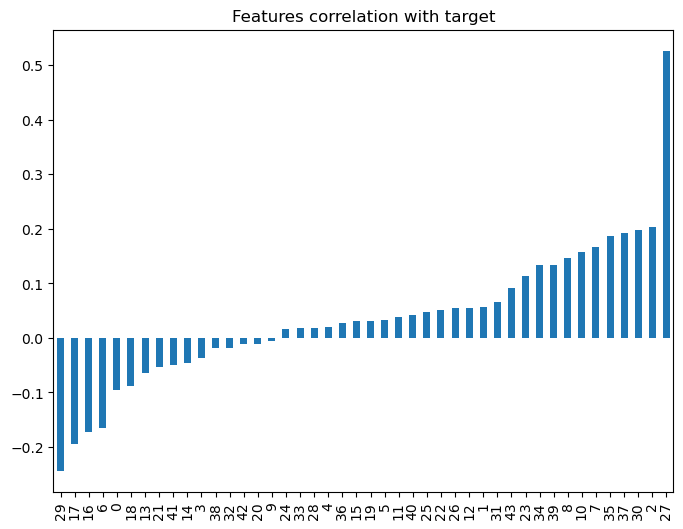

In [494]:
plt.figure(figsize=(8,6))
train.corr()['y'].sort_values()[:-1].plot(kind='bar')
plt.title('Features correlation with target')
plt.show()

## Preprocessing

* Evaluation of box plot to visualize the distribution of the data and outlayer
> As we can see, we have conciderable amount of outliers in our dataset

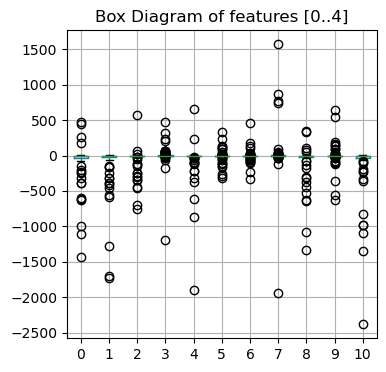

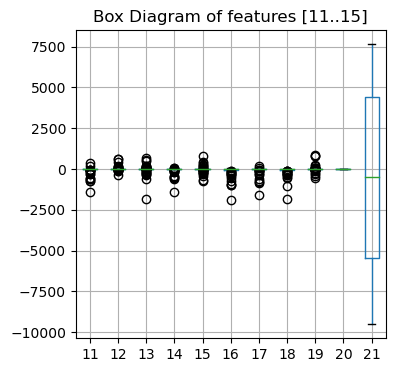

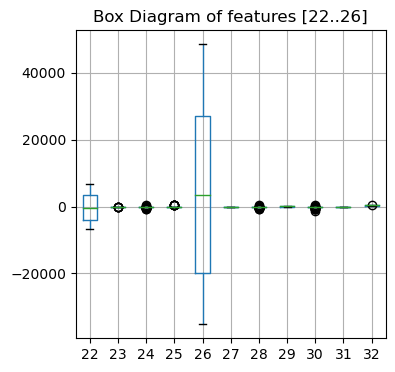

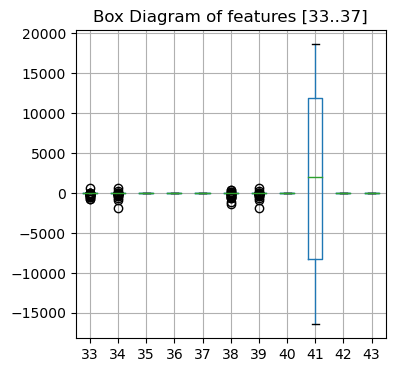

In [495]:

for row in range(len(train.columns)-1):
    if not row%11:
        plt.figure(figsize =(4,4))
        train[train.columns[row:row+11]].boxplot()
        plt.title(f'Box Diagram of features [{row}..{row+4}]')
        plt.show()



* Using robust scaler to remove outliers 

- data is centered and normalised to decrease the of curse of dimensionality 

To evaluate the prediction quality, I will use RMSE metric.  

---

In [533]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as MSE

evaluation_metric = MSE
# Scalers
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler


# Model Prediction Quality

In [538]:
# dimention reduction

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
# Regressor Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,shuffle=True,random_state=42)

scalers = [
    ('No Scaler',None),
    ('RobustScaler', RobustScaler()), 
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler())
    ]

dimention_reduction = [
    ('No dr',None),
    ('PCA', PCA(n_components=.95)),# Keeping 95% of the variance of the data
    
]

base_models = [
               ("LinearRegressor", LinearRegression()),
               ("KNeighborsRegressor", KNeighborsRegressor(n_jobs=-1)),
               ("AdaBoostRegressor", AdaBoostRegressor(random_state=42)),
               ("MLPRegressor",MLPRegressor(random_state=42, max_iter=5000,solver='adam'))]


columns = ['Scaler','DimentionReduction','Model','RMSE']

scores = pd.DataFrame(columns=columns)



for sc_name,sc in scalers:
    for dr_name, dr in dimention_reduction:
        for m_name, m in base_models:
            
            
            model = Pipeline(steps=[
                ('scaler',sc),
                ('normalizer',dr),
                ('model',m)
            ])
            model.fit(X_train,y_train)
            y_pred = model.predict(X_val)
            mse = evaluation_metric(y_val,y_pred)
            rmse = np.sqrt(mse)
            result = dict(zip(columns,[sc,dr,m,rmse]))
            scores = scores.append(result,ignore_index=True)
            
scores = scores.sort_values('RMSE').reset_index(drop=True)
scores

/tmp/ipykernel_888979/4292405875.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(result,ignore_index=True)
/tmp/ipykernel_888979/4292405875.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(result,ignore_index=True)
/tmp/ipykernel_888979/4292405875.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(result,ignore_index=True)
/tmp/ipykernel_888979/4292405875.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append(result,ignore_index=True)
/tmp/ipykernel_888979/4292405875.py:55: FutureWarning: The frame.append method is deprecated and will be

,Scaler,DimentionReduction,Model,RMSE
0,MinMaxScaler(),PCA(n_components=0.95),KNeighborsRegressor(n_jobs=-1),3.257337
1,MinMaxScaler(),None,KNeighborsRegressor(n_jobs=-1),3.380094
2,StandardScaler(),PCA(n_components=0.95),"(DecisionTreeRegressor(max_depth=3, random_sta...",3.390201
3,MinMaxScaler(),PCA(n_components=0.95),"(DecisionTreeRegressor(max_depth=3, random_sta...",3.834182
4,MinMaxScaler(),None,"(DecisionTreeRegressor(max_depth=3, random_sta...",4.045414
5,None,None,"(DecisionTreeRegressor(max_depth=3, random_sta...",4.045414
6,StandardScaler(),None,"(DecisionTreeRegressor(max_depth=3, random_sta...",4.045414
7,RobustScaler(),None,"(DecisionTreeRegressor(max_depth=3, random_sta...",4.045414
8,None,None,KNeighborsRegressor(n_jobs=-1),4.163596
9,StandardScaler(),None,"MLPRegressor(max_iter=5000, random_state=42)",4.356136


# Comment/Code Explanation

> As result reports we find that K-Neighbors Regressor  with preprocessing data with MinMaxScaler and dimention reducation of 	PCA which keeps the features within 95% of the data variance has RMSE = 3.257337  which is less compared to other regression models. now we export our candidate model results to a CSV file.



# export test results to CSV 

In [556]:
model = Pipeline(steps=[
    ('scaler',MinMaxScaler()),
    ('normalizer',PCA(n_components=.95)),
    ('model',KNeighborsRegressor(n_jobs=-1))
])

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred,columns = ['y'])
labeled_train = pd.concat([test,y_pred_df],axis = 1)
labeled_train.to_csv(PATH)

**Grading schema:**
* EDA (35%) - *single feature plots*, *multiple feature plots*...
* Data Preprocessing (25%) - *feature engineering*, *feature selection*, *dimensionality reduction*...
* Model prediction quality (15%) - described above
* Comment/explanation quality (25%) - *just describe your ML-steps*

---